In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dfcus = pd.read_csv("Customers.csv")
dfprod = pd.read_csv("Products.csv")
dftrans = pd.read_csv("Transactions.csv")

data = dftrans.merge(dfcus, on="CustomerID").merge(dfprod, on="ProductID")

In [11]:
plt.style.use("dark_background")
sns.set_palette(["gold", "white", "black"])

In [3]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

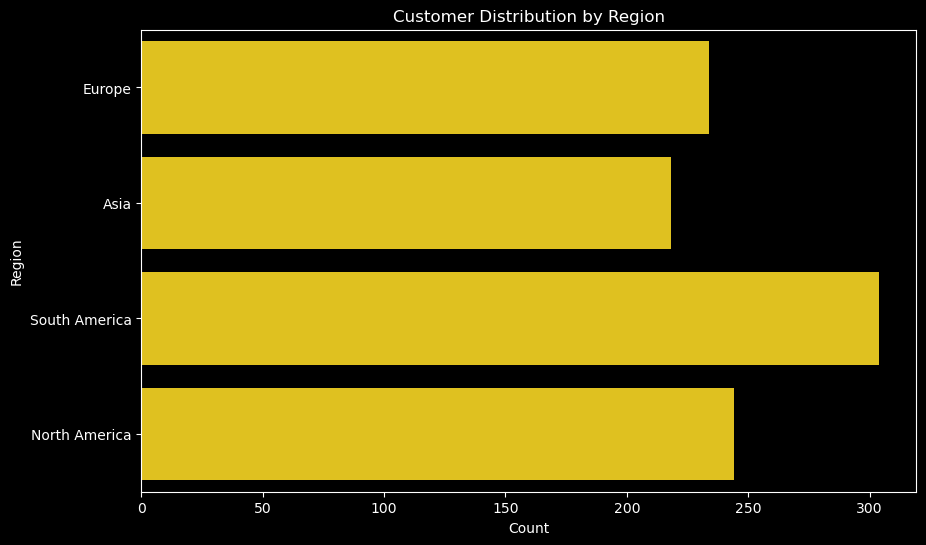

In [23]:
# TASK 1

#Customer segmentation based on region
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Region'], color='gold')
plt.title("Customer Distribution by Region", color='white')
plt.xlabel("Count", color='white')
plt.ylabel("Region", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

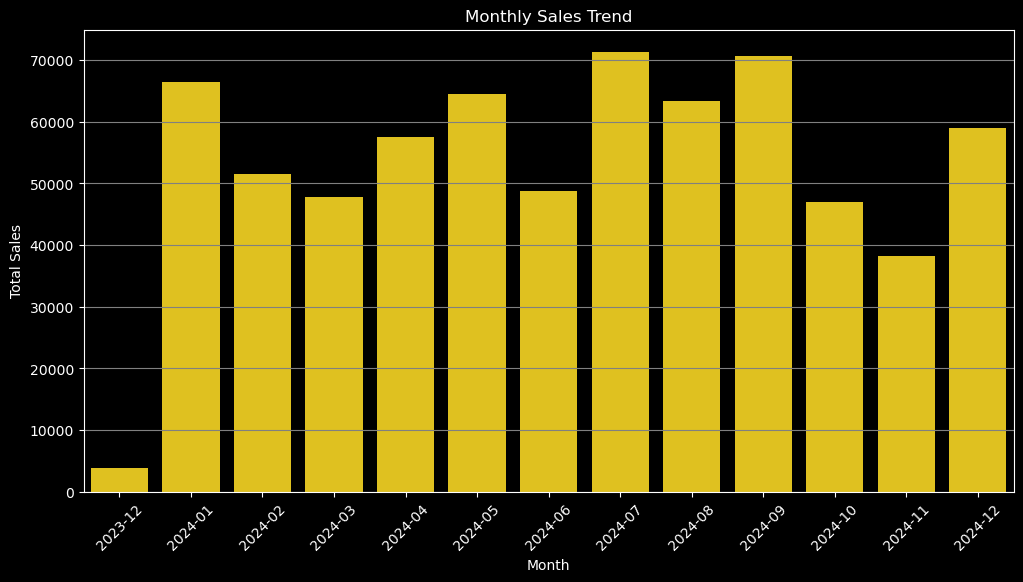

In [21]:
# Analyzing monthly sales trends for better visibility
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.to_period("M")
monthly_sales = data.groupby('Month')["TotalValue"].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='TotalValue', data=monthly_sales, color='gold')
plt.title("Monthly Sales Trend", color='white')
plt.xlabel("Month", color='white')
plt.ylabel("Total Sales", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='gray')
plt.show()


In [14]:
# Identifying top spending customers
top_customers = data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [15]:
# Product popularity
popular_products = data.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(10)
print(popular_products)

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


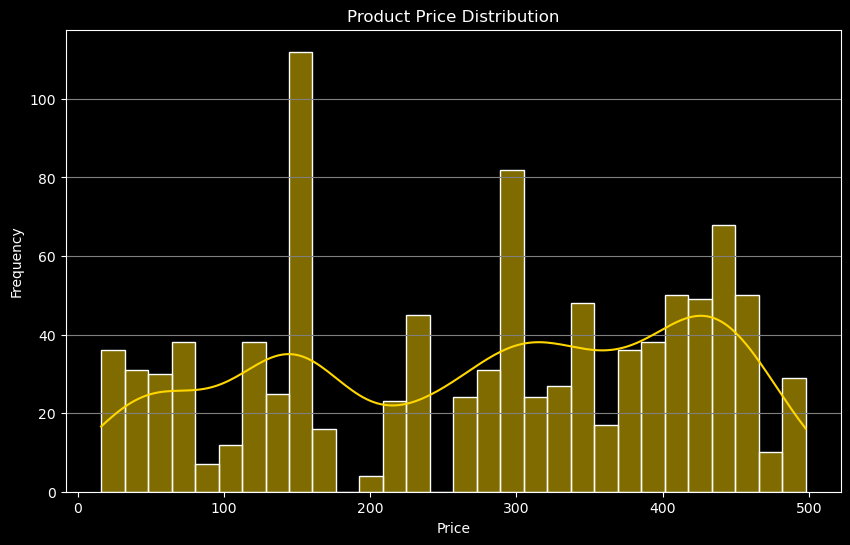

In [20]:
# Price optimization analysis using histogram
plt.figure(figsize=(10, 6))
sns.histplot(dftrans['Price'], bins=30, kde=True, color='gold')
plt.title("Product Price Distribution", color='white')
plt.xlabel("Price", color='white')
plt.ylabel("Frequency", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='gray')
plt.show()
